# Discrete system with multiple degrees of freedom

[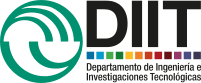](https://ingenieria.unlam.edu.ar/)    
[by-nc-sa_80x15.png](https://creativecommons.org/licenses/by-sa/4.0/) 
2025 [Víctor A. Bettachini](mailto:vbettachini@unlam.edu.ar)  

---

## Single degree of freedom

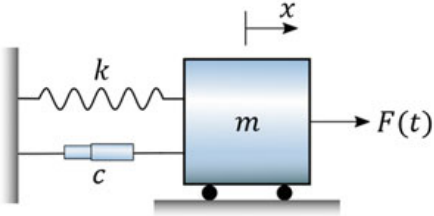

A force $\vec{F}(t)$ is exerted upon a system with the following characteristics

- m : mass  
- c : linear dumping coefficient, for a dumping force proportional to velocity  
- k : spring coefficient

$x$ is the displacement with respect to the position where the spring's length is its natural length.

In [1]:
import sympy as sm # import functions for symbolic manipulations
from sympy.physics import mechanics as me
me.init_vprinting() # dot notation for velocity and acceleration

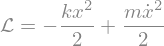

In [2]:
t = sm.symbols('t') # time
m, k, c = sm.symbols('m, k, c', positive = True)
x, F = me.dynamicsymbols('x F')
N = sm.physics.vector.ReferenceFrame('N') # frame of reference N using cartesian coordinates
r_m = x* N.x

oneHalf = sm.Rational(1,2) # we can use 0.5 
v_m = r_m.diff(t,N)
T = oneHalf* m* v_m.dot(v_m)
V = oneHalf* k* r_m.dot(r_m)

L = T- V
sm.Eq( sm.Symbol('\mathcal{L}') , L.simplify())

The nonconservative forces exerted upon the system.

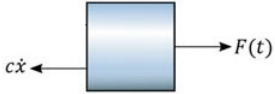

In [3]:
f = F* N.x - c* r_m.diff(t,N)
f

Given that the generalized coordinate used is the vector component, its corresponding generalized force is the resultant of forces  
$$\delta W = f \delta x = Q_x \delta x\,.$$

In [4]:
x_Q = sm.Eq(sm.Symbol('Q_x'), f.dot(N.x))
x_Q

We usually write the Euler-Lagrange equation with generalized forces as
$$
\frac{\mathrm{d}}{\mathrm{d} t} \frac{\partial}{\partial \dot{q_i}} \mathcal{L} 
- \frac{\partial}{\partial q_i} \mathcal{L} = Q_i ,
$$
in this case is

In [5]:
x_dtdqp = L.diff(x.diff(t) ).diff(t)
x_dq = L.diff(x)
x_EL_withoutNonconservatives = x_dtdqp - x_dq
x_EL = sm.Eq(x_EL_withoutNonconservatives.simplify(), x_Q.rhs)
x_EL

For the analysis of oscillations, the equation of dynamics is usually written leaving the forcing force aside.

In [6]:
sm.Eq( sm.solve(x_EL, F)[0] , F) 

## Two degrees of freedom

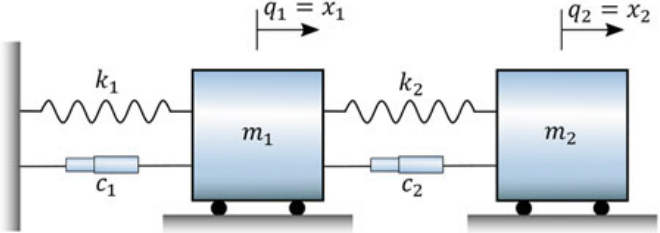

In this system again the $x_i$ are measured from the position where the spring lengths are at rest, that is, the position in which they exert no forces.
Evidently, two generalized coordinates $x_1, x_2$ are required for its description.

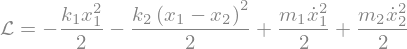

In [7]:
t = sm.symbols('t') # time
m1, m2, k1, k2, c1, c2 = sm.symbols('m_1 m_2 k_1 k_2 c_1 c_2', positive = True)
x1, x2, F1, F2 = me.dynamicsymbols('x_1 x_2 F_1 F_2')
N = sm.physics.vector.ReferenceFrame('N') # frame of reference N using cartesian coordinates
r_m1 = x1* N.x
r_m2 = x2* N.x

unMedio = sm.Rational(1,2) # we can use 0.5 
v_m1 = r_m1.diff(t,N)
v_m2 = r_m2.diff(t,N)
T = oneHalf* (m1* v_m1.dot(v_m1) + m2* v_m2.dot(v_m2) )
l_spring2 = r_m2 - r_m1
V = oneHalf* (k1* r_m1.dot(r_m1) + k2* l_spring2.dot(l_spring2) )

L = T- V
sm.Eq( sm.Symbol('\mathcal{L}') , L.simplify())

When analyzing the non-conservative forces, one must consider that the dampers respond to the velocities of both $m_i$.

In [8]:
f1 = F1* N.x - c1* r_m1.diff(t,N) - c2* (r_m1.diff(t,N)- r_m2.diff(t,N) )
f2 = F2* N.x - c2* (r_m2.diff(t,N) - r_m1.diff(t,N) )
x1_Q = sm.Eq(sm.Symbol('Q_x_1'), f1.dot(N.x))
x2_Q = sm.Eq(sm.Symbol('Q_x_2'), f2.dot(N.x))
x1_Q, x2_Q

In [9]:
x1_dtdqp = L.diff(x1.diff(t) ).diff(t)
x1_dq = L.diff(x1)
x1_EL = sm.Eq(x1_dtdqp - x1_dq , x1_Q.rhs)

x2_dtdqp = L.diff(x2.diff(t) ).diff(t)
x2_dq = L.diff(x2)
x2_EL_withoutNonconservatives = x2_dtdqp - x2_dq
x2_EL = sm.Eq(x2_dtdqp - x2_dq, x2_Q.rhs)

In [10]:
sm.Eq( sm.solve(x1_EL, F1)[0].simplify() , F1) 

In [11]:
sm.Eq( sm.solve(x2_EL, F2)[0].simplify() , F2) 

Here are the two equations, each in the form
$$
m \ddot{x} + c \dot{x} + k x = F,
$$
which can be written together as a function of a vector of generalized coordinates $\vec{q}$ in matrix form
$$
M \ddot{\vec{q}} + C \dot{\vec{q}} + K \vec{q} = \vec{F}
$$

### Matrices $M$, $C$, $K$

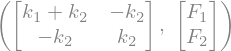

In [12]:
dummies_K={
    x1 : sm.Symbol('x_1'),
    x2 : sm.Symbol('x_2'),
} # replacing with symbols that do not depend on time, the derivatives are 0
system = [x1_EL, x2_EL ]
system_subs = [element.subs(dummies_K).simplify() for element in system]
symbols = [x1, x2]
symbols_subs = [element.subs(dummies_K).simplify() for element in symbols]
K, f = sm.linear_eq_to_matrix(system_subs, symbols_subs)
K = (-1)* K
K, (-1)*f

Here the matrix $K$ was multiplied by $-1$.
It is verified in $\vec{F}$ that the signs are equal.

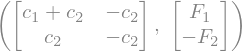

In [13]:
dummies_C={
    x1 : 0,
    x2 : 0,
    x1.diff(t) : sm.Symbol('dx1'),
    x2.diff(t) : sm.Symbol('dx2'),
}
system = [x1_EL, x2_EL ]
system_subs = [element.subs(dummies_C).simplify() for element in system]
symbols = [x1.diff(t), x2.diff(t)]
symbols_subs = [element.subs(dummies_C).simplify() for element in symbols]
C, f = sm.linear_eq_to_matrix(system_subs, symbols_subs)
C, f

Here the signs in $\vec{F}$ are not equal, so $-1$ is applied to a particular row of the matrix $C$.

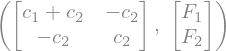

In [14]:
row_invert = 1
C[row_invert,:] = C[row_invert,:]* (-1)
f[row_invert] = f[row_invert]* (-1)
C, f

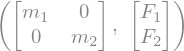

In [15]:
dummies_M={
    x1 : 0,
    x2 : 0,
    x1.diff(t) : 0,
    x2.diff(t) : 0,
    x1.diff(t,2) : sm.Symbol('ddx1'),
    x2.diff(t,2) : sm.Symbol('ddx2'),
}
system = [x1_EL, x2_EL ]
system_subs = [element.subs(dummies_M).simplify() for element in system]
symbols = [x1.diff(t,2), x2.diff(t,2)]
symbols_subs = [element.subs(dummies_M).simplify() for element in symbols]
M, f = sm.linear_eq_to_matrix(system_subs, symbols_subs)
M = (-1)* M
M, (-1)*f

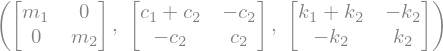

In [16]:
M, C, K

## Natural frequencies

### A single $\omega$ when there is a single degree of freedom

A system with a single degree of freedom is not affected by $F$ or $c$
$$
\begin{aligned}
m \ddot{x} + c \dot{x} + k x &= F\\
m \ddot{x} + k x &= 0
\end{aligned},
$$
when displaced from its equilibrium, it will oscillate forever at an $\omega$ as a function of $k$ and $m$.

An harmonic solution $x = A \operatorname{e}^{at}$ with non-zero amplitude $\tilde{A}$ and (angular) frequency $a$ is assumed.
$$
\begin{aligned}
m \ddot{x} + k x &= 0\\
m \tilde{A} a^2 \operatorname{e}^{at} + k \tilde{A} \operatorname{e}^{at} &= 0\\
\tilde{A} (m a^2 + k) \operatorname{e}^{at} &= 0
\end{aligned},
$$
which requires that $a = \pm \sqrt{- \frac{k}{m}} = \pm i \sqrt{\frac{k}{m}}$, and there will therefore be two solutions that are linearly combined to obtain the general solution
$$
\begin{aligned}
x &= A_1 \operatorname{e}^{i \sqrt{\frac{k}{m}} t} + A_2 \operatorname{e}^{-i \sqrt{\frac{k}{m}} t}\\
x &= A_1 \operatorname{e}^{i \omega t} + A_2 \operatorname{e}^{- i \omega t}\\
x &= A \cos{(\omega t + \phi_0)}\\
x &= x(0) \cos{(\omega t)} + \frac{\dot{x}(0)}{\omega} \sin{(\omega t)}
\end{aligned}.
$$

### Multiple $\omega$'s for multiple degrees of freedom

If the system needs more generalized coordinates to describe its dynamics, $q_i$ will also have corresponding $\omega_i$ determined by the elements of matrices $K$ and $M$.

Proposing an identical solution where $\vec{q} = \vec{A} \operatorname{e}^{i \omega t}$, that is, all elements of $\vec{q}$ oscillate in unison with $\omega$ at amplitudes $\vec{A}$
$$
\begin{aligned}
M \ddot{\vec{q}} + K \vec{q} &= 0\\
- M \omega^2 \vec{A} \operatorname{e}^{i \omega t} + K \tilde{A} \operatorname{e}^{i \omega t} &= 0\\
(-M \omega^2 + K) \vec{A} \operatorname{e}^{i \omega t} &= 0
\end{aligned}.
$$
This only has a non-trivial solution ($\vec{A} \neq 0$) if what is in parentheses is a **singular matrix**, which will be so if and only if its **determinant is zero**
$$
\left| K - \omega^2 M \right| =0
$$
In fact
$$
(K - \omega^2 M) \vec{A} = 0,
$$
is an **eigenvalue** $\omega^2$ and **eigenvector** $\vec{A}$ problem.

### Frequencies $\omega$ and amplitudes $\vec{A}$ of the example
The generalized coordinates vector is

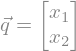

In [17]:
vecq = sm.Matrix([[x1],[x2]])
sm.Eq(sm.Symbol(r'\vec{q}'), vecq, evaluate=False)

therefore, in this case

$$
(K - \omega^2 M) \vec{A} = 0,
$$

turns out to be

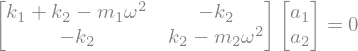

In [18]:
omega, a_1, a_2 = sm.symbols('omega a_1 a_2')
parenthesis = K - omega**2* M
vecA = sm.Eq(sm.Symbol(r'\vec{A}'), sm.Matrix([[a_1],[a_2]]), evaluate=False)
sm.Eq(sm.MatMul(parenthesis, vecA.rhs), 0, evaluate=False)

Isolating $\omega$ from the determinant set equal to zero

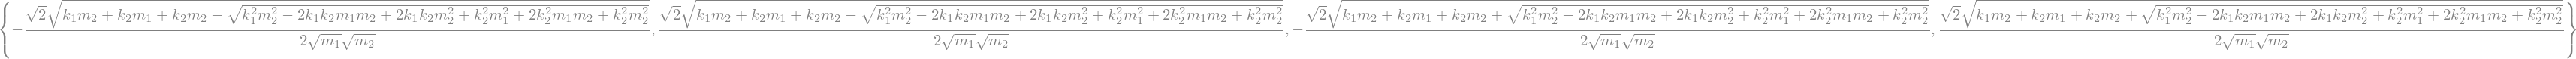

In [19]:
determinant = sm.Eq(sm.det(parenthesis),0)
omegas = sm.solveset(determinant, omega)
omegas

The negative solutions have no physical application, since there is no $\omega < 0$.

The $\omega_i$ are usually ordered from smallest to largest. It is easy to see which is the smallest by the sign in the discriminant within the square root.

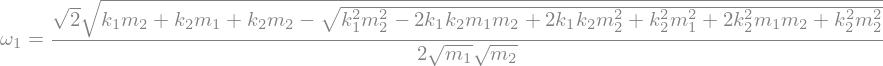

In [20]:
omega_1 = sm.Eq(sm.Symbol('omega_1'), list(omegas)[3])
omega_1

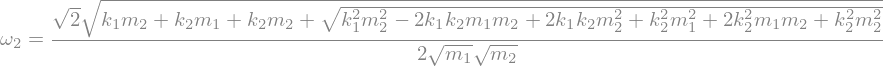

In [21]:
omega_2 = sm.Eq(sm.Symbol('omega_2'), list(omegas)[1])
omega_2

## Amplitude of oscillation for each $\omega$

The eigenvalues $\omega^2$ are substituted into $K- \omega^2 M$ to obtain the corresponding eigenvectors.
These will give a relationship between the components of the amplitude vector $\vec{A}$.

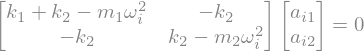

In [22]:
omega_i, a_i1, a_i2 = sm.symbols('omega_i a_{i1} a_{i2}')
veca_i = sm.Matrix([[a_i1],[a_i2]])
sm.Eq(sm.MatMul(K - omega_i**2* M, veca_i), 0, evaluate=False)

### For $\omega_1$

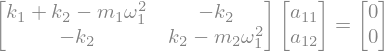

In [23]:
zeros = sm.Matrix([[0],[0]])
a_11, a_12 = sm.symbols('a_{11} a_{12}')
vecA1 = sm.Matrix([[a_11],[a_12]])
sm.Eq(sm.MatMul(parenthesis.subs(omega, omega_1.lhs), vecA1), zeros, evaluate=False)

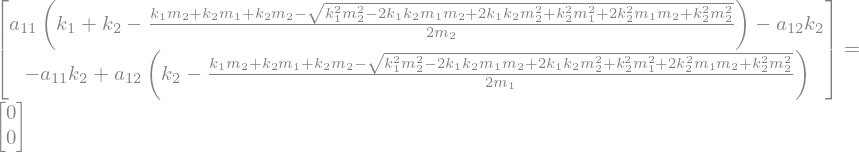

In [24]:
system_1 = parenthesis.subs(omega, omega_1.rhs)* vecA1
sm.Eq(system_1, zeros, evaluate=False)

From either of the two equalities, a relationship between $a_{11}$ and $a_{12}$ can be obtained.

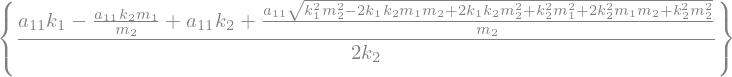

In [25]:
system_1_list = [system_1[0].expand(), system_1[1].expand()]
a_12_sol1 = sm.solveset(system_1_list[0], a_12)
a_12_sol1

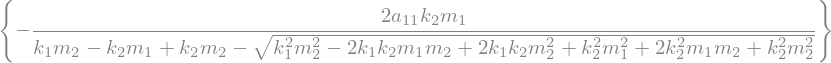

In [26]:
a_12_sol2 = sm.solveset(system_1_list[1], a_12)
a_12_sol2

The solutions appear to be different, but it can be proven that they are equivalent by testing with imaginary quantities.

In [27]:
parameters_test = {
    m1 : 1,
    m2 : 2,
    k1 : 3,
    k2 : 4,
    c1 : 5,
    c2 : 6,
} # dummy values

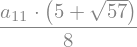

In [28]:
a_12_sol1.subs(parameters_test).args[0].simplify()

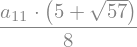

In [29]:
a_12_sol2.subs(parameters_test).args[0].simplify().simplify()

Then, the amplitude corresponding to $\omega_1$ is

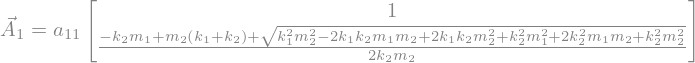

In [30]:
amplitude_1_con = sm.Matrix([a_11,  a_12_sol1.args[0].simplify() ])
A_1 = sm.Eq(sm.Symbol(r'\vec{A}_1'), sm.MatMul(a_11, amplitude_1_con/a_11), evaluate=False)
A_1

### For $\omega_2$

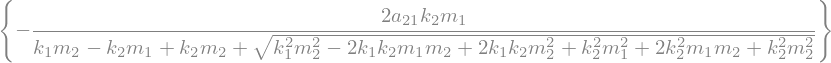

In [31]:
a_21, a_22 = sm.symbols('a_{21} a_{22}')
vecA2 = sm.Matrix([[a_21],[a_22]])
system_2 = parenthesis.subs(omega, omega_2.rhs)* vecA2
system_2_list = [fila.expand() for fila in system_2]
a_22_sol2 = sm.solveset(system_2_list[1], a_22)
a_22_sol2

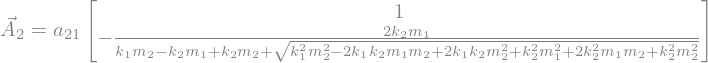

In [32]:
amplitude_2_con = sm.Matrix([a_21, a_22_sol2.args[0].simplify() ])
A_2 = sm.Eq(sm.Symbol(r'\vec{A}_2'), sm.MatMul(a_21, amplitude_2_con/a_21), evaluate=False)
A_2

## General solution for the dynamics

Before obtaining an expression, it is useful to analyze what the relative amplitude says for each $\omega$.
For illustrative purposes, the imaginary values previously introduced will be used.

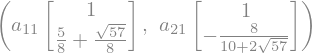

In [33]:
A_1.rhs.subs(parameters_test), A_2.rhs.subs(parameters_test)

With these parameters, it can be seen that with $\omega_1$ both $x_i$ move toward the same side, but $x_2$ does so with greater amplitude than $x_1$.
While with $\omega_2 > \omega_1$, when $x_2$ moves to the right, $x_1$ does so toward the left and with greater amplitude.
The lowest frequency **always** corresponds to the one that presents fewer *inversions* in the direction of oscillation of the system components.  

These different ways of oscillating are called **normal modes of oscillation** and the system will have as many of them as **characteristic frequencies**, that is, the number of degrees of freedom.

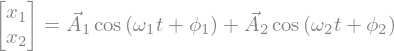

In [34]:
phi_1, phi_2 = sm.symbols(r'phi_1 phi_2')
vecX_sol_lhs = sm.Eq(vecq, A_1.lhs * sm.cos(omega_1.lhs* t + phi_1 ) + A_2.lhs * sm.cos(omega_2.lhs* t + phi_2), evaluate=False)
vecX_sol_lhs

To find the general solution, the two solutions are added and the coefficients $a_{11}, a_{21}, \phi_1, \phi_2$ are determined from initial conditions.

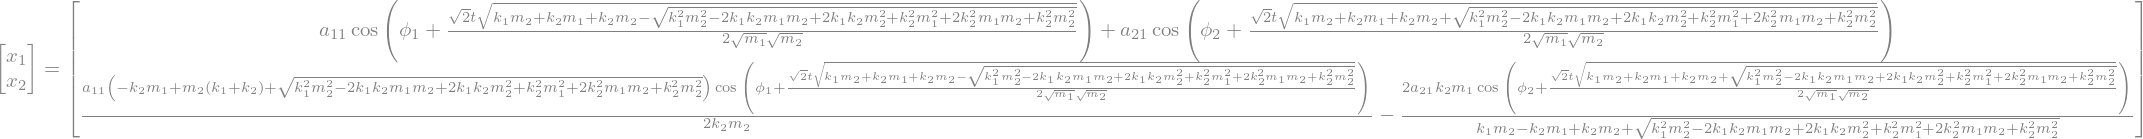

In [35]:
vecX_sol_rhs = sm.Eq(vecq, A_1.rhs * sm.cos(omega_1.rhs* t + phi_1 ) + A_2.rhs * sm.cos(omega_2.rhs* t + phi_2), evaluate=False)
vecX_sol_rhs

## Initial conditions

If the system started from rest, $\dot{\vec{x}}(t=0) = 0$

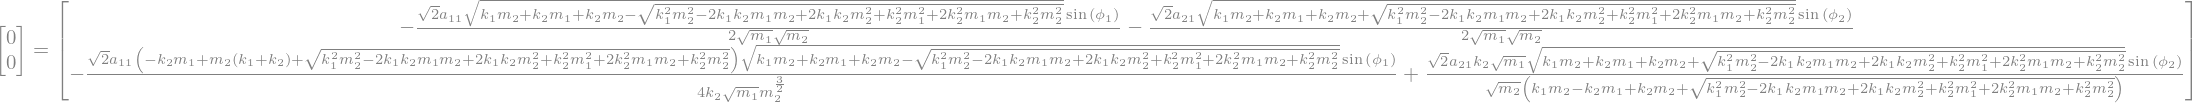

In [36]:
initial_velocity = sm.Eq(vecX_sol_rhs.lhs.subs([(x1, 0), (x2, 0) ]), vecX_sol_rhs.rhs.diff(t).subs([(t,0)]), evaluate=False)
initial_velocity

In [37]:
phases = sm.solve(initial_velocity, phi_1, phi_2)
phases

All terms are multiplied by $\sin{\phi_i}$.
Setting $\phi_1 = \phi_2 = 0$ ensures this condition is satisfied.

In [38]:
vecX_phases = vecX_sol_rhs.subs([(phi_1,0), (phi_2,0)] )

With initial positions of $\vec{x}(t=0)$, $a_{11}$ and $a_{21}$ are determined.

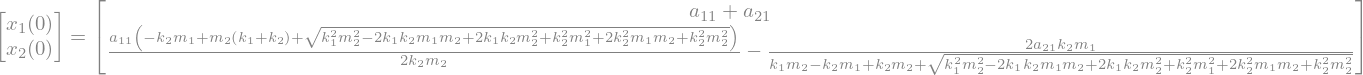

In [39]:
vecX_initialPositions = vecX_phases.subs(t,0)
vecX_initialPositions

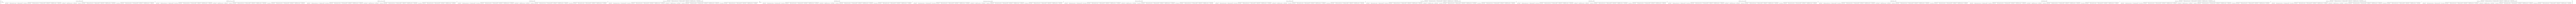

In [40]:
initial_amplitudes = sm.solve(vecX_initialPositions, a_11, a_21)
initial_amplitudes

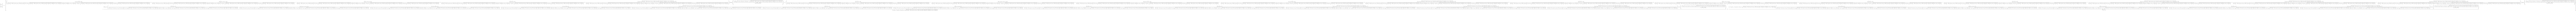

In [41]:
vecX_final = vecX_phases.subs(initial_amplitudes)
vecX_final

We set the physical parameters

In [42]:
parameters = {
    m1 : 20,
    m2 : 10,
    k1 : 20000,
    k2 : 13200,
    c1 : 200,
    c2 : 350,
} # [kg], [N m-1], [N m-1 s]

We set the initial positions $x_1(t=0), x_2(t=0)$

In [43]:
initialPositions = {
    x1.subs(t,0) : 0.5,
    x2.subs(t,0) : 1.0,
} # [m]
initialPositions

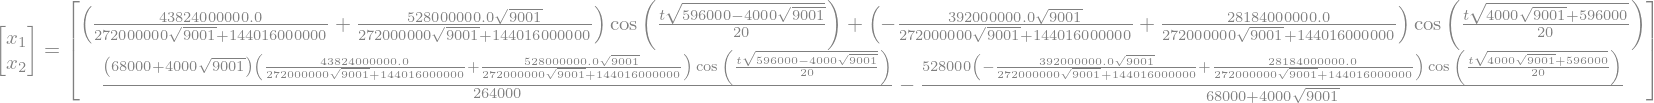

In [44]:
vecX_parameters = vecX_final.subs(parameters).subs(initialPositions)
vecX_parameters

## Graphing

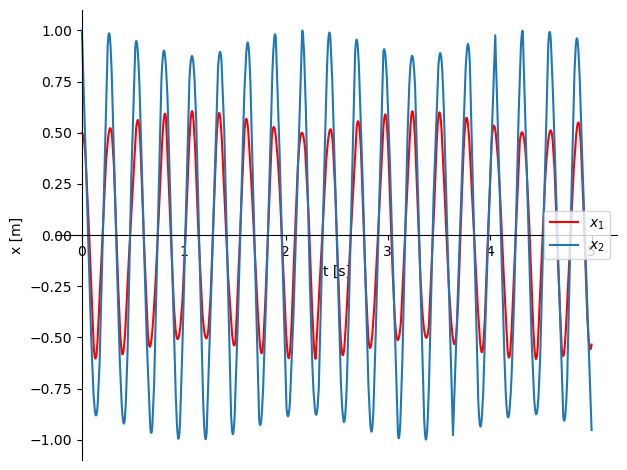

In [45]:
graphOne = sm.plot(vecX_parameters.rhs[0], vecX_parameters.rhs[1],
                      (t, 0, 5), ylabel='x [m]', xlabel='t [s]', legend=True, show=False)
graphOne[0].line_color='r'
graphOne[0].label='$x_1$'
graphOne[1].label='$x_2$'
graphOne.show()

Evidently, having established $x_1(0), x_2(0)$ with the same sign ended up exciting the first mode to a greater extent, with both $x_i$ displaced toward the same side.
Now it would be interesting to do the opposite, to exclusively excite the 2nd mode.
To do this, we will find out what initial conditions do that.
In the following expression

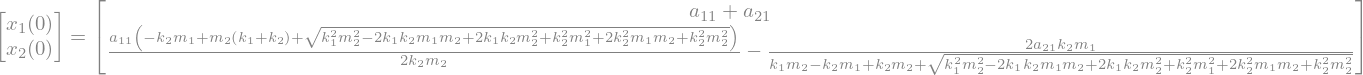

In [46]:
vecX_initialPositions

we set

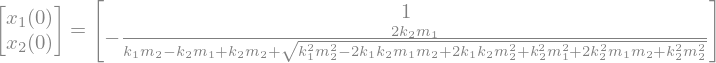

In [47]:
vecX_initialPositions_only2ndMode = vecX_initialPositions.subs([(a_11, 0), (a_21, 1)])
vecX_initialPositions_only2ndMode

and we substitute these $x_1(0), x_2(0)$ in the general solution that starts from rest.

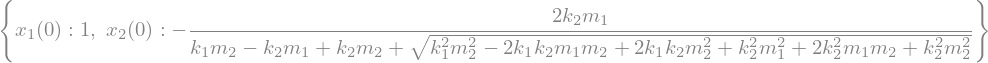

In [48]:
initialPositions_only2ndMode = {
    x1.subs(t,0) : vecX_initialPositions_only2ndMode.rhs[0],
    x2.subs(t,0) : vecX_initialPositions_only2ndMode.rhs[1],
}
initialPositions_only2ndMode

Substituting the parameters in the expression makes it evident that with $x_1(0)$ extending to one side, $x_2(0)$ does so toward the other.

In [49]:
initialPositions_only2ndMode[x1.subs(t,0)], initialPositions_only2ndMode[x2.subs(t,0)].subs(parameters).evalf()

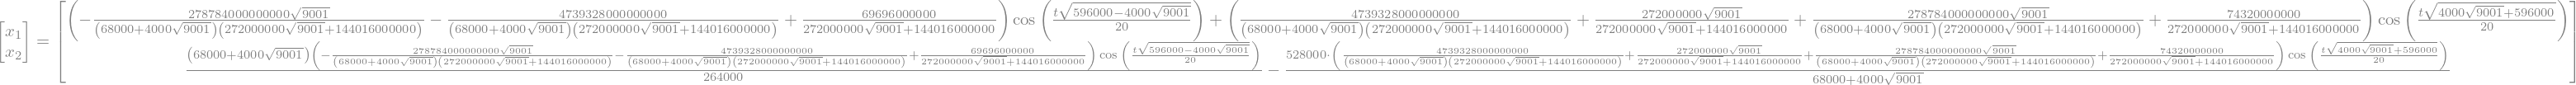

In [50]:
vecX_only2ndMode = vecX_final.subs(initialPositions_only2ndMode).subs(parameters)
vecX_only2ndMode

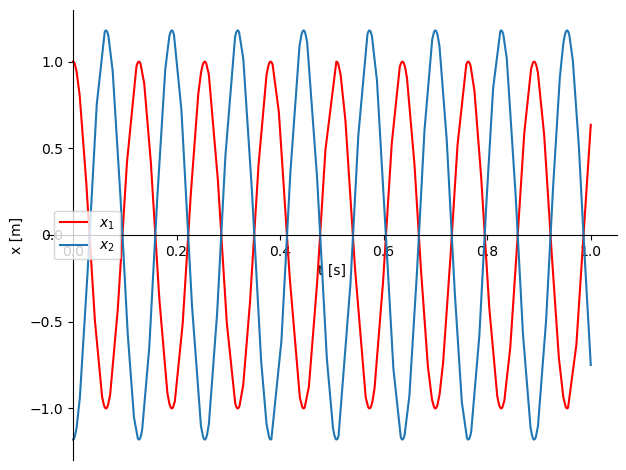

In [51]:
graph_only2ndMode = sm.plot(vecX_only2ndMode.rhs[0], vecX_only2ndMode.rhs[1],
                      (t, 0, 1), ylabel='x [m]', xlabel='t [s]', legend=True, show=False)
graph_only2ndMode[0].line_color='r'
graph_only2ndMode[0].label='$x_1$'
graph_only2ndMode[1].label='$x_2$'
graph_only2ndMode.show()

It can be seen that the frequency is much higher.
The scale has 1/5 of the extension of the previous one.
That is, starting from the relative amplitudes characteristic of $\omega_2$ makes the system oscillate with such frequency higher than $\omega_1$.
